In [1]:
# Testing Model parameters
from models.parameters import ModelParams

params = ModelParams()
params

ModelParams(z_min=0.0, z_max=100.0, L_shaft=100.0, T=1.0, g=9.80665, WaveVector=9001698.147821756, A_z0=100.0, A_v0=-20.0, B_z0=0.0, B_v0=40.0, h_bar=1.0545718176461565e-34, c=299792458.0, w0=2696919063030079.5)

In [2]:
# Testing Simulation Settings
from models.settings import SimulationSettings

# Testing setting the settings:
settings = SimulationSettings(
    hours=5.0,
    frep=0.5,
    start_hr=5.0,
    sensor_dt=10.0,
    N_sensors=5,
    random_noise=0.005,
    sensor_resolution=0.05,
    sensor_accuracy=0.0
)

settings.validate()
settings

SimulationSettings(hours=5.0, frep=0.5, start_hr=5.0, sensor_dt=10.0, N_sensors=5, random_noise=0.005, sensor_resolution=0.05, sensor_accuracy=0.0)

In [3]:
import numpy as np
import importlib
import models.temperature
importlib.reload(models.temperature)
from models.temperature import TemperatureField
import matplotlib.pyplot as plt

# For linear: Gamma = 1, Mid_amp = 0
field = TemperatureField(
    # Surface temperature parameters
        T_surface_mean_C = 14.0,
        T_surface_amp_C = 2.5,
        Surface_phase_shift = 15.0,  # hours
        
        # Bottom temperature parameters
        T_bottom_mean_C = 20.2,
        T_bottom_amp_C = 1.0,
        Bottom_phase_shift = 20.0,  # hours

        # Vertical profile shaping
        gamma = 1.0,   # >1 biases toward bottom, <1 toward top
        T_mid_amp_C = 0.0,
        Mid_phase_shift = 15.0,  # hours
    )


t = np.linspace(0, 24, 1000)
#z_vals = [0, 25, 50, 75, 100]

Top = field.temperature(t, 100)
Bot = field.temperature(t, 0)
Mid = field.temperature(t, 50)

Mid_check = (Top + Bot) / 2


# for i in range(len(t)):
#     print(f"t={t[i]:.2f} hr: Top={Top[i]:.2f} C, Mid={Mid[i]:.2f} C, Bot={Bot[i]:.2f} C, Mid_check={Mid_check[i]:.2f} C, Diff={Mid[i]-Mid_check[i]:.6f} C")


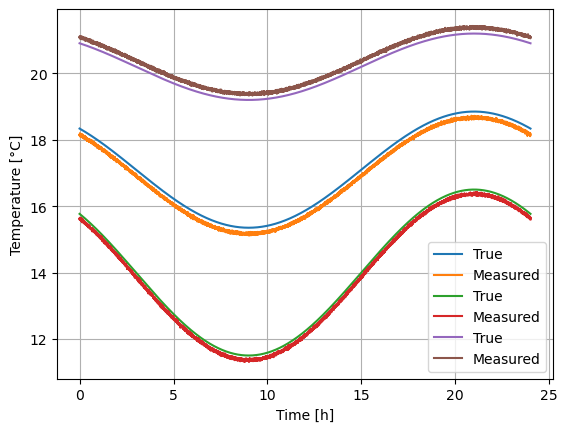

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from models.temperature import TemperatureField
from models.Sensor import Sensor
from models.settings import SimulationSettings

field = TemperatureField(gamma=1.0, T_mid_amp_C=0.0)

settings = SimulationSettings(
    hours=1.0,
    frep=1.0,
    start_hr=0.0,
    sensor_dt=10.0,
    N_sensors=3,
    random_noise=0.02,
    sensor_resolution=None,
    sensor_accuracy=0.5,
)

t_eval = np.linspace(0, 24, 86400)

sensors = Sensor(
    L=params.L_shaft,
    settings=settings,
    seed=123
)

T_true, T_meas = sensors.measure(field, t_eval)

plt.plot(t_eval, T_true[1] - 273.15, label="True")
plt.step(t_eval, T_meas[1] - 273.15, where="post", label="Measured")
plt.plot(t_eval, T_true[2] - 273.15, label="True")
plt.step(t_eval, T_meas[2] - 273.15, where="post", label="Measured")
plt.plot(t_eval, T_true[0] - 273.15, label="True")
plt.step(t_eval, T_meas[0] - 273.15, where="post", label="Measured")
plt.legend()
plt.xlabel("Time [h]")
plt.ylabel("Temperature [°C]")
plt.grid()
plt.show()

# for i in range(len(t_eval)):
#     print(f"True: {T_true[2][i]-273.15:.2f} C, Meas: {T_meas[2][i]-273.15:.2f}C, T_eval: {t_eval[i]*3600}")


In [5]:
print(sensors.offsets)

[ 0.18235186 -0.18158442 -0.13428917]
